In [50]:
# Just Testing and stuff but just here for historical value 
# the actuall running code is in the .py file

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Basics

In [56]:
def cstep(n):
    if n % 2 == 0:
        return n/2
    else:
        return 3*n+1

In [4]:
def cfull(n):
    i=0
    while n > 2: #could just check if ==2**x but thats probably harder
        # idea: log_2 % 1 ==0 as 1.5%1=0.5..
        n = cstep(n)
        i = i+1
    return i

In [5]:
maxn = 250
x = np.linspace(1, maxn, maxn, dtype="int")
y = [cfull(i) for i in x]

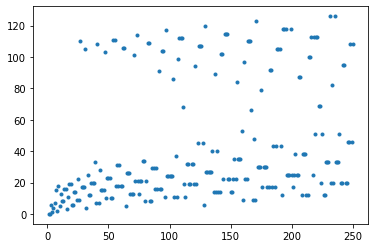

In [6]:
plt.scatter(x, y, marker=".")
#looks like on wikipedia so nice la

In [7]:
%%timeit
maxn = 100
x = np.linspace(1, maxn, maxn, dtype="int")
y = [cfull(i) for i in x] #not efficient

2.65 ms ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Text(0.5, 1.0, 'looks O(n)')

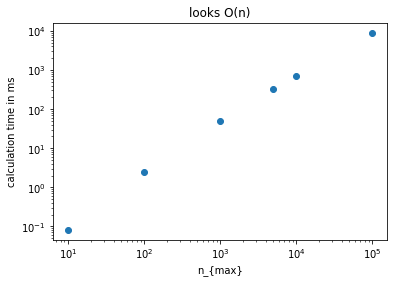

In [9]:
plt.scatter([1e1, 1e2, 1e3, 5e3, 1e4, 1e5], [0.08, 2.5, 49,327, 704, 9100])
plt.xscale("log")
plt.yscale("log")
plt.ylabel("calculation time in ms")
plt.xlabel(r'n_{max}')
plt.title("looks O(n)")

# Tests

In [80]:
def c_checker(n):
    # pastvals=[cstep(maxTest+2**16-3)] a possible test
    pastvals = []
    i=0
    while n > 2: #could just check if ==2**x but thats probably harder
        # idea: log_2 % 1 ==0 as 1.5%1=0.5..
        n = cstep(n)
        if n in pastvals:
            return True, n
        pastvals.append(n)
        i = i+1 
        if i>1e6:
            print("might be diverging")
            return True, n 
    return False, i

In [81]:
def c_checker_arr(x, intrvl):
    i=0
    while (c_checker(x[i])[0]==False) & (i<intrvl-1):
        i = i+1
    if i==intrvl-1:
        print("done")
    else:
        print("YO number is:", x[i], "and loop at: ", c_checker(x[i])[1])

In [13]:
maxTest = 2**68
MaxTest = 2**120
intrvl = 2**16
intrvl = 2**2

x = np.arange(maxTest, maxTest+intrvl)

In [14]:
c_checker_arr(x, intrvl)

done


In [15]:
# automation idea (possibly kiessler as third author..)
#vector = range(i*10, (i+1) * 10)
#i=1
#while (f(vector)==1):
#    i = i+1
#    vector = range(i*10, (i+1) * 10)
#f(vector)

# ideas
interval 2**24 took a long ass time...

could make automatic intervall changing so goto next intervall after one is finished

could to progression prints after every quarter or tenth of any intervall

# Automation

In [82]:
import json
f = open("progress.json","r")
dat = json.loads(f.read())
current_no = dat["Current"]
intrvl = dat["Interval"]

In [83]:
x_arr = np.arange(current_no, current_no+intrvl)

In [84]:
c_checker_arr(x_arr, intrvl)

done


In [87]:
current_new = current_no+intrvl-1

In [90]:
# load json module
import json

# python dictionary with key value pairs
dict = {'Start' : 2**120, 'Interval' : 2**16, 'Current' : current_new}

# create json object from dictionary
jsondat = json.dumps(dict)

# open file for writing, "w" 
f = open("progress.json","w")

# write json object to file
f.write(jsondat)

# close file
f.close()

In [91]:
# all together
i=0
while(1):
    # load data

    f = open("progress.json","r")
    dat = json.loads(f.read())
    current_no = dat["Current"]
    intrvl = dat["Interval"]
    f.close()

    # execute  collatz test

    x_arr = np.arange(current_no, current_no+intrvl)

    c_checker_arr(x_arr, intrvl)

    current_new = current_no+intrvl-1
    print(current_new)


    # save data


    dict = {'Start' : 2**120, 'Interval' : 2**16, 'Current' : current_new}

    jsondat = json.dumps(dict)

    f = open("progress.json","w") # w for write, r for read

    f.write(jsondat)

    f.close()
    i=i+1
    if i > 2:
        break

done
1329227995784915872903807060280410174
done
1329227995784915872903807060280475709
done
1329227995784915872903807060280541244


In [93]:
1329227995784915872903807060280410174 - 1329227995784915872903807060280475709 + 2**16

1

# optimisation

In [17]:
np.log10(2**24)

7.224719895935548

In [18]:
%%timeit
cfull(1234123412341234123434121351351313513135)

121 µs ± 345 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit
c_checker(1234123412341234123434121351351313513135)

908 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


a factor of 9 does not motivate to rewrite c_checker. it being slower makes sense. if this were much slower I could just use the divergence condition as a check. 